# **Class 6: Part 2 - Introduction to NLP**

In [1]:
from IPython.display import Image, display
project_path = '/Users/tmsantos/Documents/CapstoneProject/CapstoneProject/'

## Introduction to NLP

###  What is NLP?

NLP is a field of linguistics and machine learning focused on understanding everything related to human language. The aim of NLP tasks is not only to understand single words individually, but to be able to understand the context of those words.

There are several NLP tasks that we traditionally try to solve using neural networks:

- **Text Classification** is used when we need to classify text fragment into one of several pre-defined classes. Examples include e-mail spam detection, news categorization, assigning support request to one of the categories, and more.

- **Intent Classification** is one specific case of text classification, when we want to map input utterance in the conversational AI system into one of the intents that represent the actual meaning of the phrase, or intent of the user.

- **Named Entity Recognition (NER)** is a task of extracting some entities from text, such as dates, addresses, people names, etc. Together with intent classification, NER is often used in dialog systems to extract parameters from user's utterance.

- **Text Summarization** extracts the most meaningful pieces of text, giving a user a compressed version that contains most of the meaning.

- **Question/Answer** is a task of extracting an answer from a piece of text. This model gets text fragment and a question as an input, and needs to find exact place within the text that contains answer. For example, the text "John is a 22 year old student who loves to use Microsoft Learn", and the question How old is John should provide us with the answer 22.


### Why is it challenging?

Computers don’t process information in the same way as humans. For example, when we read the sentence “I am hungry,” we can easily understand its meaning. Similarly, given two sentences such as “I am hungry” and “I am sad,” we’re able to easily determine how similar they are. For machine learning (ML) models, such tasks are more difficult. The text needs to be processed in a way that enables the model to learn from it. And because language is complex, we need to think carefully about how this processing must be done. There has been a lot of research done on how to represent text, and we will look at some methods in the next chapter.

### Representing text

If we want to solve Natural Language Processing (NLP) tasks with neural networks, we need some way to represent text as tensors. Computers already represent textual characters as numbers that map to fonts on your screen using encodings such as ASCII or UTF-8.

We understand what each letter **represents**, and how all characters come together to form the words of a sentence. However, computers by themselves do not have such an understanding, and a neural network has to learn the meaning during training.


Therefore, we can use different approaches when representing text:
* **Character-level representation**, when we represent text by treating each character as a number. Given that we have $C$ different characters in our text corpus, the word *Hello* would be represented by $5\times C$ tensor. Each letter would correspond to a tensor column in one-hot encoding.
* **Word-level representation**, when we create a **vocabulary** of all words in our text sequence or sentence(s), and then represent each word using one-hot encoding. This approach is somehow better, because each letter by itself does not have much meaning, and thus by using higher-level semantic concepts - words - we simplify the task for the neural network. However, given a large dictionary size, we need to deal with high-dimensional sparse tensors.  For example, if we have a vocabulary size of 10,000 different words.  Then each word would have an one-hot encoding length of 10,000; hence the high-dimensional.

To unify those approaches, we typically call an atomic piece of text **a token**. In some cases tokens can be letters, in other cases - words, or parts of words.

The process of converting text into a sequence of tokens is called **tokenization**. Next, we need to assign each token to a number, which we can feed into a neural network.

In [ ]:
 !pip install torchtext==0.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.3 MB/s eta 0:00:00


In [ ]:
import torch
import torchtext

print(torch.__version__)
print(torchtext.__version__)

2.4.1+cu121
0.6.0


In [ ]:
import torchtext
import pandas as pd

First let's import a pretrained tokenizer.

In [ ]:
tokenizer = torchtext.data.utils.get_tokenizer('basic_english')

Create a folder for our dataset.

In [ ]:
!mkdir AG_NEWS

Download the dataset from torch.datasets.

In [ ]:
_, _ = torchtext.datasets.AG_NEWS("AG_NEWS/")

ag_news_csv.tar.gz: 100%|██████████| 11.8M/11.8M [00:00<00:00, 105MB/s]
120000lines [00:08, 14050.07lines/s]
120000lines [00:08, 13526.79lines/s]
7600lines [00:00, 13273.44lines/s]


In [ ]:
import pandas as pd

# Load the datasets, ignoring the first line and setting column names to 0, 1, 2
train_dataframe = pd.read_csv('AG_NEWS/ag_news_csv/train.csv', header=None, names=['label', 'title', 'description'])
test_dataframe = pd.read_csv('AG_NEWS/ag_news_csv/test.csv', header=None, names=['label', 'title', 'description'])

# Define the labels map
labels_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

# Replace numerical labels in the first column (0) with their corresponding category
train_dataframe[0] = train_dataframe['label'].replace(labels_map)
test_dataframe[0] = test_dataframe['label'].replace(labels_map)

# Check the updated datasets
print(train_dataframe.head())
print(test_dataframe.head())

   label                                              title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         description         0  
0  Reuters - Short-sellers, Wall Street's dwindli...  Business  
1  Reuters - Private investment firm Carlyle Grou...  Business  
2  Reuters - Soaring crude prices plus worries\ab...  Business  
3  Reuters - Authorities have halted oil export\f...  Business  
4  AFP - Tearaway world oil prices, toppling reco...  Business  
   label                                              title  \
0      3                  Fears for T N pension after talks   
1      4  The Race is On: Second Private Team Sets Launc...   
2      4      Ky. Company Wins Grant to St

We'll use PyTorch's tokenizer to split words and spaces in the first 2 news articles. In our case, we use basic_english for the tokenizer to understand the language structure. This will return a string list of the text and characters.

In [ ]:
first_sentence = train_dataframe.loc[0, "description"]
second_sentence = train_dataframe.loc[1, "description"]

f_tokens = tokenizer(first_sentence)
s_tokens = tokenizer(second_sentence)

print(f'\nfirst token list:\n{f_tokens}')
print(f'\nsecond token list:\n{s_tokens}')


first token list:
['reuters', '-', 'short-sellers', ',', 'wall', 'street', "'", 's', 'dwindling\\band', 'of', 'ultra-cynics', ',', 'are', 'seeing', 'green', 'again', '.']

second token list:
['reuters', '-', 'private', 'investment', 'firm', 'carlyle', 'group', ',', '\\which', 'has', 'a', 'reputation', 'for', 'making', 'well-timed', 'and', 'occasionally\\controversial', 'plays', 'in', 'the', 'defense', 'industry', ',', 'has', 'quietly', 'placed\\its', 'bets', 'on', 'another', 'part', 'of', 'the', 'market', '.']


Next, to convert text to numbers, we will need to build a vocabulary of all tokens. We first build the dictionary using the `Counter` object, and then create a `Vocab` object that would help us deal with vectorization:

In [ ]:
import collections

counter = collections.Counter()
for line in train_dataframe['description'].values:
    counter.update(tokenizer(line))

In [ ]:
vocab = torchtext.vocab.Vocab(counter, min_freq=1)

Using vocabulary, we can easily encode our tokenized string into a set of numbers. Let's use the first news article as an example:

In [ ]:
# Calculate the size of the vocabulary
vocab_size = len(vocab)

print(f"Vocab size is {vocab_size}")

# Define a function 'encode' to convert an input text 'x' into a list of indices
# It maps each token in the input text to its corresponding index in 'vocab'
def encode(x):
    return [vocab.stoi[s] for s in tokenizer(x)]

vec = encode(first_sentence)

print(vec)

Vocab size is 88162
[31, 12, 44992, 4, 421, 333, 18, 10, 60690, 7, 46375, 4, 39, 3596, 813, 422, 2]


In [ ]:
# Define a function 'decode' to convert a list of indices 'x' back into their corresponding tokens
# It maps each index in the input list to its corresponding token in 'vocab'
def decode(x):
    return [vocab.itos[i] for i in x]

decode(vec)

['reuters',
 '-',
 'short-sellers',
 ',',
 'wall',
 'street',
 "'",
 's',
 'dwindling\\band',
 'of',
 'ultra-cynics',
 ',',
 'are',
 'seeing',
 'green',
 'again',
 '.']

### Bag of Words text representation

Because words represent meaning, sometimes we can figure out the meaning of a text by just looking at the individual words, regardless of their order in the sentence. For example, when classifying news, words like weather, snow are likely to indicate weather forecast, while words like stocks, dollar would count towards financial news.

**Bag of Words** (BoW) vector representation is the most commonly used traditional vector representation. Each word is linked to a vector index, vector element contains the number of occurrences of a word in a given document.



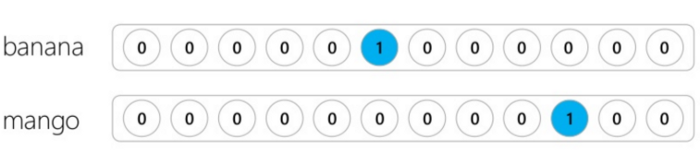

In [2]:
display(Image(filename=project_path+'images/class6/bag-of-words-example.png', width=600, height=200))

To compute bag-of-words vector from the vector representation of our AG_NEWS dataset, we can use the following function:

In [ ]:
import torch

# Getting the size of the vocabulary
vocab_size = len(vocab)

# The function takes 'text' as input and uses a BoW vocabulary size 
def to_bow(text, bow_vocab_size=vocab_size):

    # Create a tensor of zeros with a size equal to the vocabulary size
    res = torch.zeros(bow_vocab_size, dtype=torch.float32)

    # Iterate over the encoded representation of the input text
    for i in encode(text):

        # Check if the index is within the bounds of the vocabulary
        if i < bow_vocab_size:

            # Increment the corresponding index in the tensor
            res[i] += 1

    # Return the BoW tensor
    return res

In [ ]:
to_bow(first_sentence, vocab_size)

tensor([0., 0., 1.,  ..., 0., 0., 0.])

#### Training BoW classifier

Now that we have learned how to build a Bag-of-Words representation of our text, let's train a classifier on top of it. First, we need to convert our dataset for training in such a way, that all positional vector representations are converted to bag-of-words representation. This can be achieved by passing `bowify` function as `collate_fn` parameter to standard torch `DataLoader`. The `collate_fn` gives you the ability to apply your own function to the dataset as it's loaded by the `DataLoader`:

In [ ]:
from torch.utils.data import Dataset

class DatasetRTE(Dataset):
    def __init__(self, dataset):
        self.X = dataset['description'].values
        self.y = dataset['label'].values

    def __len__(self):
        "Returns the total number of samples."
        return len(self.X)

    def __getitem__(self, idx):
        "Returns one sample of data, data and label (X, y)."
        return self.X[idx], self.y[idx]

In [ ]:
train_dataset = DatasetRTE(train_dataframe)
test_dataset = DatasetRTE(test_dataframe)

In [ ]:
from torch.utils.data import DataLoader
import numpy as np

# this collate function gets list of batch_size tuples, and needs to
# return a pair of feature-label tensors for the whole minibatch
def bowify(samples):

  # Stack the bag-of-words (BoW) representations of the input samples into a tensor
  stacked_tensors = torch.stack([to_bow(sample[0]) for sample in samples])

  # Convert the labels from samples to integers and adjust them by subtracting 1
  # (assuming labels start at 1, this adjusts them to range [0,3] for a 4-class classification task)
  tensor_of_labels = torch.LongTensor([sample[1] - 1 for sample in samples])

  # Return a tuple containing the feature tensor and the label tensor
  return (stacked_tensors, tensor_of_labels)

train_loader = DataLoader(train_dataset, batch_size=2, collate_fn=bowify, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, collate_fn=bowify, shuffle=True)

Now let's define a simple classifier neural network that contains one linear layer. The size of the input vector equals to `vocab_size`, and the output size corresponds to the number of classes (4). Because we are solving a classification task, the final activation function is `LogSoftmax()`.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(vocab_size, 4),
    torch.nn.LogSoftmax(dim=1))

Now we will define a standard PyTorch training loop. Because our dataset is quite large, for our teaching purpose we will train only for one epoch, and sometimes even for less than an epoch (specifying the epoch_size parameter allows us to limit training).

In [ ]:
def train_epoch(model , dataloader, lr=0.01, optimizer=None, loss_fn = torch.nn.NLLLoss(), epoch_size=None, report_freq=200):
    # Initialize the optimizer
    optimizer = optimizer or torch.optim.Adam(model.parameters(),lr=lr)

    # Model on training mode
    model.train()
    total_loss,acc,count,i = 0,0,0,0

    # Training step
    for features, labels in dataloader:

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        out = model(features)

        # Calculate loss
        loss = loss_fn(out,labels)

        # Calculate the gradients
        loss.backward()

        # Update the gradients
        optimizer.step()

        # Calculate the loss
        total_loss+=loss
        _,predicted = torch.max(out,1)
        acc+=(predicted==labels).sum()
        count+=len(labels)
        i+=1
        if i%report_freq==0:
            print(f"{count}: acc={acc.item()/count}")
        if epoch_size and count>epoch_size:
            break

    return total_loss.item()/count, acc.item()/count

In [ ]:
train_epoch(model, train_loader, epoch_size=8000)

400: acc=0.5775
800: acc=0.6725
1200: acc=0.7166666666666667
1600: acc=0.745625
2000: acc=0.7575
2400: acc=0.7708333333333334
2800: acc=0.7771428571428571
3200: acc=0.7828125
3600: acc=0.7877777777777778
4000: acc=0.79575
4400: acc=0.7975
4800: acc=0.80125
5200: acc=0.8055769230769231
5600: acc=0.8085714285714286
6000: acc=0.81
6400: acc=0.81359375
6800: acc=0.8155882352941176
7200: acc=0.8170833333333334
7600: acc=0.8186842105263158
8000: acc=0.82075


(0.27347832231395275, 0.8206698325418645)


### Term Frequency Inverse Document Frequency TF-IDF

In BoW representation, word occurrences are evenly weighted, regardless of the word itself. However, it is clear that frequent words, such as *a*, *in*, etc. are much less important for the classification, than specialized terms. In fact, in most NLP tasks some words are more relevant than others.

**TF-IDF** stands for **term frequency–inverse document frequency**. It is a variation of bag of words, where instead of a binary 0/1 value indicating the appearance of a word in a document, a floating-point value is used, which is related to the frequency of word occurrence in the corpus.

More formally, the weight $w_{ij}$ of a word $i$ in the document $j$ is defined as:
$$
w_{ij} = tf_{ij}\times\log({N\over df_i})
$$
where
* $tf_{ij}$ is the number of occurrences of $i$ in $j$, i.e. the BoW value we have seen before
* $N$ is the number of documents in the collection
* $df_i$ is the number of documents containing the word $i$ in the whole collection

TF-IDF value $w_{ij}$ increases proportionally to the number of times a word appears in a document and is offset by the number of documents in the corpus that contains the word, which helps to adjust for the fact that some words appear more frequently than others. For example, if the word appears in *every* document in the collection, $df_i=N$, and $w_{ij}=0$, and those terms would be completely disregarded.

First, let's compute document frequency $df_i$​ for each word $i$. We can represent it as tensor of size `vocab_size`. We will limit the number of documents to $N=1000$ to speed up processing. For each input sentence, we compute the set of words (represented by their numbers), and increase the corresponding counter:

In [ ]:
N = 1000
df = torch.zeros(vocab_size)
for description in train_dataset[:N][0]:
    for i in set(encode(line)):
        df[i] += 1

In [ ]:
df.shape

torch.Size([88162])

Now that we have document frequencies for each word, we can define `tf_idf` function that will take a string, and produce TF-IDF vector. We will use `to_bow` defined above to calculate term frequency vector, and multiply it by inverse document frequency of the corresponding term. Remember that all tensor operations are element-wise, which allows us to implement the whole computation as a tensor formula:

In [ ]:
def tf_idf(df, sample):
    bow = to_bow(sample)
    return bow*torch.log((N+1)/(df+1))

In [ ]:
print(tf_idf(df, train_dataset[0][0]))

tensor([0., 0., 0.,  ..., 0., 0., 0.])


### Embeddings

In our previous example, we operated on high-dimensional bag-of-words vectors with the length of vocab_size, and we were explicitly converting from low-dimensional positional representation vectors into sparse one-hot representations.

The goal of using word embeddings and reducing the dimensionality are:

- Finding the meaning of words based on their word approximation to other words. This is done by taken two word vectors and analyzing how often the words in the vectors are used together. The higher the frequency, the more you can find a correlation and relationship between the words.
- This process of training the word embedding to find word approximations between words in a given dimension is how we reduce the word representation to low-dimensions.
- Embedding vectors serve as numeric representations of words and are used as input to other machine learning network layers.
- The embedding vector becomes the stored lookup table for words in the vocabulary.


#### Tokenizer

We define the `tokenize_sample` function below which takes in an `sample`, a `tokenizer` and a `max_length` argument, tokenizes the text in the example, given by `sample['description']`, trims the tokens to a maximum length and then returns a dictionary with the new feature name and feature value for that example.

We're trimming the tokens to a maximum length here as some examples are unnecessarily long and we can predict sentiment pretty well just using the first couple of hundred tokens.

In [ ]:
import pandas as pd

# Load the datasets, ignoring the first line and setting column names to 0, 1, 2
train_dataframe = pd.read_csv('AG_NEWS/ag_news_csv/train.csv', header=None, names=['label', 'title', 'description'])
test_dataframe = pd.read_csv('AG_NEWS/ag_news_csv/test.csv', header=None, names=['label', 'title', 'description'])

# Define the labels map
labels_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

# Replace numerical labels in the first column (0) with their corresponding category
train_dataframe[0] = train_dataframe['label'].replace(labels_map)
test_dataframe[0] = test_dataframe['label'].replace(labels_map)

In [ ]:
tokenizer = torchtext.data.utils.get_tokenizer("basic_english")

In [ ]:
def tokenize_sample(sample, tokenizer, max_length):
    # Apply the tokenizer to the input sample and truncate the token list to 'max_length'
    tokens = tokenizer(sample)[:max_length]

    # Return the list of tokens for the sample
    return tokens

max_length = 256

train_dataframe['tokens'] = train_dataframe['description'].map(lambda sample: tokenize_sample(sample, tokenizer, max_length))
test_dataframe['tokens'] = test_dataframe['description'].map(lambda sample: tokenize_sample(sample, tokenizer, max_length))

In [ ]:
train_dataframe

label                                              title  \
0           3  Wall St. Bears Claw Back Into the Black (Reuters)   
1           3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2           3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3           3  Iraq Halts Oil Exports from Main Southern Pipe...   
4           3  Oil prices soar to all-time record, posing new...   
...       ...                                                ...   
119995      1  Pakistan's Musharraf Says Won't Quit as Army C...   
119996      2                  Renteria signing a top-shelf deal   
119997      2                    Saban not going to Dolphins yet   
119998      2                                  Today's NFL games   
119999      2                       Nets get Carter from Raptors   

                                              description         0  \
0       Reuters - Short-sellers, Wall Street's dwindli...  Business   
1       Reuters - Private investment firm Carlyle Grou...  Business   
2       Reuters - Soaring crude prices plus worries\ab...  Business   
3       Reuters - Authorities have halted oil export\f...  Business   
4       AFP - Tearaway world oil prices, toppling reco...  Business   
...                                                   ...       ...   
119995   KARACHI (Reuters) - Pakistani President Perve...     World   
119996  Red Sox general manager Theo Epstein acknowled...    Sports   
119997  The Miami Dolphins will put their courtship of...    Sports   
119998  PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...    Sports   
119999  INDIANAPOLIS -- All-Star Vince Carter was trad...    Sports   

                                                   tokens  
0       [reuters, -, short-sellers, ,, wall, street, '...  
1       [reuters, -, private, investment, firm, carlyl...  
2       [reuters, -, soaring, crude, prices, plus, wor...  
3       [reuters, -, authorities, have, halted, oil, e...  
4       [afp, -, tearaway, world, oil, prices, ,, topp...  
...                                                   ...  
119995  [karachi, (, reuters, ), -, pakistani, preside...  
119996  [red, sox, general, manager, theo, epstein, ac...  
119997  [the, miami, dolphins, will, put, their, court...  
119998  [pittsburgh, at, ny, giants, time, 1, 30, p, ....  
119999  [indianapolis, --, all-star, vince, carter, wa...  

[120000 rows x 5 columns]

#### Creating a Vocabulary

One issue with creating a vocabulary using every single word in the dataset is that there are usually a considerable amount of unique tokens. One way to combat this is to either only construct the vocabulary only using the most commonly appearing tokens, or to only use tokens which appear a minimum amount of times in the dataset. In this notebook, we do the latter, keeping on the tokens which appear 5 times.

What happens to tokens which appear less than 5 times? We replace them with a special unknown token, denoted by `<unk>`. For example, if the sentence "This film is great and I love it", but the word "love" was not in the vocabulary, it would become: "This film is great and I `<unk>` it".

The first special token is our unknown token, the other, `<pad>` is a special token we'll use for padding sentences.

In [ ]:
counter = collections.Counter()
for line in train_dataframe['tokens'].values:
    counter.update(line)

In [ ]:
min_freq = 5
# Define special tokens: <unk> (unknown token) and <pad> (padding token)
special_tokens = ["<unk>", "<pad>"]

# Only include tokens that appear at least 'min_freq' times
# Add the special tokens <unk> and <pad> to the vocabulary
vocab = torchtext.vocab.Vocab(counter,
                              min_freq=min_freq,
                              specials=special_tokens,
                              )
unk_index = vocab["<unk>"]
pad_index = vocab["<pad>"]

Now we can first examine it by checking the number of tokens in the vocabulary.

In [ ]:
len(vocab)

26604

In [ ]:
itos = vocab.itos

#### Numericalizing Data

Now we have our vocabulary, we can numericalize our data. This involves converting the tokens within our dataset into indices. Similar to how we tokenized our data using the `Dataset.map` method, we'll define a function that takes an example and our vocabulary, gets the index for each token in each example and then creates an `ids` field which containes the numericalized tokens.


In [ ]:
def numericalize_sample(sample, vocab):
    # Convert each token in the sample to its corresponding index from the vocabulary.
    # If the token is not in the vocabulary, use the 'unk_index' for unknown tokens.
    ids = torch.LongTensor([vocab.stoi.get(token, unk_index) for token in sample])
    return ids

In [ ]:
train_dataframe['ids'] = train_dataframe['tokens'].map(lambda sample: numericalize_sample(sample, vocab))
test_dataframe['ids'] = test_dataframe['tokens'].map(lambda sample: numericalize_sample(sample, vocab))

#### Dealing with variable sequence size

When working with words, you are going to have text sequences or sentences that are of different lengths.  This can be problematic in training the word embeddings neural network. For consistency in the word embedding and improve training performance, we would have to apply some padding. This can be done using the `torch.nn.functional.pad` on a tokenized dataset. It adds `"<pad>"` values to the empty indices at the end of the vector.


In [ ]:
class DatasetRTE2(Dataset):
    def __init__(self, dataset):
        self.X = dataset['ids'].values
        self.y = dataset['label'].values

    def __len__(self):
        "Returns the total number of samples."
        return len(self.X)

    def __getitem__(self, idx):
        "Returns one sample of data, data and label (X, y)."
        return {'input_ids': self.X[idx], 'label': self.y[idx]}

In [ ]:
from torch.nn.utils.rnn import pad_sequence

def padify(samples):

    # Extract the 'input_ids' from each sample and pad them to the same length
    # 'batch_first=True' means the batch dimension will be the first, and 'padding_value' specifies
    # the value used for padding (in this case, 'pad_index')
    batch_ids = pad_sequence([sample['input_ids'] for sample in samples],
                             batch_first=True,
                             padding_value=pad_index)

    # Convert labels from samples into integers, adjusting them by subtracting 1
    # (assuming labels start from 1, this maps them to the range [0, 3] for a 4-class classification task)
    batch_labels = torch.LongTensor([sample['label'] - 1 for sample in samples])

    # Create a dictionary with the padded input IDs and corresponding labels
    batch = {"ids": batch_ids, "label": batch_labels}

    # Return the padded batch
    return batch

In [ ]:
train_dataset2 = DatasetRTE2(train_dataframe)
test_dataset2 = DatasetRTE2(test_dataframe)

In [ ]:
train_loader = DataLoader(train_dataset2, batch_size=6, collate_fn=padify, shuffle=True)

In [ ]:
for b in train_loader:
  print(b)
  break

{'ids': tensor([[    3,    55,    14,    10,    47, 11326,  5487, 19632,    27,    74,
          1702,    22,     3,   480,     7, 11861,     4,   161,     6,     5,
           210,     8,    28,  2977,  1736,     2,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1],
        [   31,    12,  1539,     0,  1512,     0,  1290,  4976,    13,     3,
           303,   375,    51,     4,    35,     0,  1782,  6578,  8171,   920,
             5,   202,    15,    86,     0,  9865,  7154,  1009,  1807,  1345,
             6,     3,   573,     2,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
             1],
        [  454,    22,     3,   454,  9916,   435,     8,   196,   347,     3,
            81,     7,  1113,     2,   266,   170,     6,  3964,   454,  3734,
          


#### What is embedding?

The idea of **embedding** is to represent words by lower-dimensional dense vectors, which somehow reflect semantic meaning of a word. We will later discuss how to build meaningful word embeddings, but for now let's just think of embeddings as a way to lower dimensionality of a word vector.

So, embedding layer would take a word as an input, and produce an output vector of specified `embedding_size`. In a sense, it is very similar to `Linear` layer, but instead of taking one-hot encoded vector, it will be able to take a word number as an input.

By using embedding layer as a first layer in our network, we can switch from bag-or-words to **embedding bag** model, where we first convert each word in our text into corresponding embedding, and then compute some aggregate function over all those embeddings, such as `sum`, `average` or `max`.  


Our classifier neural network will start with an embedding layer, then aggregation layer, and a linear classifier on top of it:
- `vocab_size` are the size of the total number of words we have in our vocabulary.
- `embed_dim` are the length of the word dimensions that show relationships between words passed as in the network.
- `num_class` are the number of news categories we are trying to classify (e.g. World, Sports, Business, Sci/Tech)


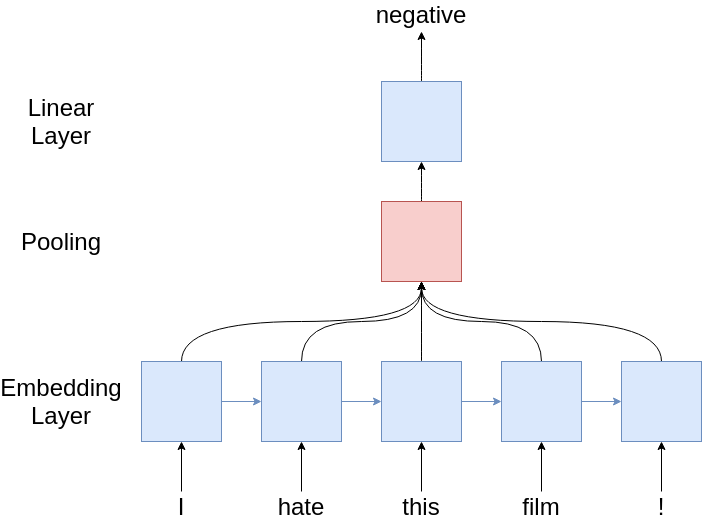

In [15]:
display(Image(filename=project_path+'images/class6/nbow_model.png', width=800, height=800))

Let's create a Vocabulary and Word-to-Index Mapping

In [11]:
word_to_index = {
    "hello": 0,
    "world": 1,
    "pytorch": 2
}
vocab_size = len(word_to_index)  # 3 words in the vocabulary

In [13]:
import torch
import torch.nn as nn

# Embedding layer: map 3 words to a 5-dimensional vector space
# It's a matrix of size 3x5
embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=5)

# Convert words to indices
word_indices = torch.tensor([word_to_index["hello"], word_to_index["world"], word_to_index["pytorch"]])

# Get the embeddings for each word
word_embeddings = embedding_layer(word_indices)

- The embedding_layer takes the word indices [0, 1, 2] corresponding to "hello", "world", and "pytorch" and maps each of them to a 5-dimensional vector.
- This is essentially a lookup operation where each word index is mapped to its corresponding row in the embedding matrix.

In [14]:
print("Embeddings:")
print(word_embeddings)

Embeddings:
tensor([[ 1.7181,  1.9511, -1.8691,  0.2807, -1.2982],
        [-0.4999, -0.9096,  0.0355,  0.7668, -0.6107],
        [-0.2778,  1.7548,  0.9636,  1.3914,  0.1900]],
       grad_fn=<EmbeddingBackward0>)


In [ ]:
import torch.nn as nn

class NBoW(nn.Module):
    def __init__(self, vocab_size, embedding_dim, output_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim, output_dim)

    def forward(self, ids):
        # ids = [batch size, seq len]
        embedded = self.embedding(ids)
        # embedded = [batch size, seq len, embedding dim]
        pooled = embedded.mean(dim=1)
        # pooled = [batch size, embedding dim]
        prediction = self.fc(pooled)
        # prediction = [batch size, output dim]
        return prediction

#### Training embedding classifier

Now we’ll define our training dataloader and use the `collate_fn` to apply the padify function to the datasets as they loaded in each batch.  As a result, the training dataset will be padded.

In [ ]:
vocab_size = len(vocab)
embedding_dim = 300
output_dim = 4

model = NBoW(vocab_size, embedding_dim, output_dim)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 7,982,404 trainable parameters


In [ ]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    return accuracy

In [ ]:
import tqdm # Used for progress bar

def train(data_loader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []
    for batch in tqdm.tqdm(data_loader, desc="training..."):
        ids = batch["ids"].to(device)
        label = batch["label"].to(device)
        prediction = model(ids)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
    return np.mean(epoch_losses), np.mean(epoch_accs)

In [ ]:
n_epochs = 10
best_valid_loss = float("inf")
train_data_loader = DataLoader(train_dataset2, batch_size=16, collate_fn=padify, shuffle=True)
metrics = collections.defaultdict(list)

for epoch in range(n_epochs):
    train_loss, train_acc = train(
        train_data_loader, model, criterion, optimizer, device
    )
    print(train_loss)
    print(train_acc)
    break

training...: 100%|██████████| 7500/7500 [09:56<00:00, 12.56it/s]

0.4320779642595599
0.8634833333333334
